# Exercise 3.4 - Relative positive acceleration

## Introduction 
In this exercise we are going to investigate the acceleration in terms of the relative positive acceleration (RPA). The RPA is a measure for the frequency and intensity of positive accelerations. This exercise consists of two parts. In the first part, we are going to calculate the RPA of an exemplary day of our vehicle. The second part focuses on the analysis of the RPA per day. 

## Preparation
First of all we need to import all necessary packages and modules. In this case we need:
* pandas (pandas dataframes)
* numpy (numpy arrays as well as various mathematical methods)
* matplotlib.pyplot (plotting)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Further, we want to set the font size of all plots globally. 

In [2]:
# set font size of all plots globally
plt.rcParams.update({'font.size': 16})

## Data import - Part 1
Here the necessary data for the first part of this exercise is imported and saved as a pandas dataframe using pandas read_pickle function. Further, we sort the dataframe chronologically. 

In [3]:
data_df = pd.read_pickle('data/e34_part1_data_df.pkl')

## Available data - Part 1
The data that is available for the following exercises is a pandas dataframe called data_df with the following rows:
* time: timestamp as datetime64
* distance: distance in m to the next time step
* speed: speed values in m/s
* time_diff: difference in s between two subsequent timestamps
* acceleration: acceleration in m/s^2

In [4]:
display(data_df)

,time,distance,speed,time_diff,acceleration
0,2018-01-10 16:29:30,0.000000,0.00,1.0,2.00
1,2018-01-10 16:29:31,1.111008,2.00,1.0,0.75
2,2018-01-10 16:29:32,3.157773,2.75,1.0,0.25
3,2018-01-10 16:29:33,3.265216,3.00,1.0,3.50
4,2018-01-10 16:29:34,8.885284,6.50,1.0,0.25
...,...,...,...,...,...
855,2018-01-10 16:43:45,2.147746,2.50,1.0,-0.75
856,2018-01-10 16:43:46,1.601146,1.75,1.0,-0.75
857,2018-01-10 16:43:47,0.222390,1.00,1.0,-0.75
858,2018-01-10 16:43:48,2.220476,0.25,1.0,-0.25


## Exercise 3.4.1 Calculate realative positive acceleration

### Task
The RPA is a measure for the frequency and intensity of positive accelerations. This exercise consists of two parts. It is calculated according to:
$$RPA = \frac{1}{d_{tot}} \sum_{t=0}^{t_{final}} v \cdot a^{+} \cdot \delta t$$

where $d_{tot}$ is the total daily distance, $a^{+}$ indicates a positive acceleration, $v$ is the speed and $\delta t$ is the duration until the next timestamp, i.e., time_diff.

* Implement a function that calculates the relative positive acceleration for one day of our vehicle according to:
* Test your function using the given data.

##### Signature of the function
rpa = calculate_relative_positive_acceleration(acceleration, speed, time_diff, distance) 

* INPUT: acceleration, speed, time_diff, distance as numpy arrays
* OUPUT: rpa as scalar value 

###### Reminder
-

##### Hint
-

##### Solution
rpa = 0.34727876393372664

### Your code here:

In [5]:
def calculate_relative_positive_acceleration(acceleration, speed, time_diff, distance):
    d_tot = 0
    rpa_sum = 0
    
    for i in range(len(distance)):
        d_tot = d_tot + distance[i]
        
        if acceleration[i] > 0:
            rpa_sum = rpa_sum + speed[i] * acceleration[i] * time_diff[i]        
    
    rpa = rpa_sum / d_tot
    
    return rpa

In [6]:
calculate_relative_positive_acceleration(data_df.acceleration, data_df.speed, data_df.time_diff, data_df.distance)

0.3472787639337259

## Data import - Part 2
Here the necessary data for the second part of this exercise is imported and saved as a pandas dataframe using pandas read_pickle function. Further, we sort the dataframe chronologically. 

In [7]:
data_df = pd.read_pickle('data/e34_part2_data_df.pkl')

## Available data - Part 2
The data that is available for the following exercises is a pandas dataframe called data_df with the following rows:
* day: day as datetime64
* rpa: rpa in m/s^2

In [8]:
display(data_df)

,day,rpa
0,2018-01-10 15:42:53,0.364283
1,2018-01-10 16:29:30,0.347279
2,2018-01-10 16:56:54,0.324305
3,2018-01-10 17:03:53,0.362872
4,2018-01-10 18:45:03,0.404759
...,...,...
428,2018-03-03 12:40:59,0.180929
429,2018-03-03 14:59:33,0.317544
430,2018-03-04 08:59:45,0.171854
431,2018-03-04 13:55:10,0.155865


## Exercise 3.4.2 Plot rpa using different box plot settings

### Task
In this task we are going to visualize the rpa per day using a box plot. 
1. Create a plot as depicted below. It consists of three subplots. The first one is a basic plot, i.e., no parameters are passed to the box plot function. In the second one outliers are hide. The last box plot uses whiskers, that includes all outliers. 

##### Signature of the script
The signature of the script definies the interfaces (INPUT, OUTPUT) of the current task within this notebook. It is up to you, how you get from INPUT to OUTPUT.
* INPUT: Pandas dataframe data_df
* OUPUT: Plot as depicted below

###### Reminder
* The goal of a box plot is to compare graphically various data sets within one diagram.

##### Hint
* Use the official matplotlib documentation for further information (https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html)

##### Solution
![title](data/img/solution_e432.png)

### Your code here:

In [9]:
def plotRPAUsingDifferentBox(data_df):
    fig, ax = plt.subplots(1, 3, figsize=(10,10))
    
    ax[0].boxplot(data_df.rpa)
    ax[1].boxplot(data_df.rpa, showfliers=False)
    ax[2].boxplot(data_df.rpa, whis='range')
    
    ax[0].set_ylim([-0.1, 0.7])
    ax[0].grid(b=True, axis='y')
    ax[1].set_ylim([-0.1, 0.7])
    ax[1].grid(b=True, axis='y')
    ax[2].set_ylim([-0.1, 0.7])
    ax[2].grid(b=True, axis='y')
    
    ax[0].set(ylabel='Relative positive acceleration in m/s^2',
              title='Basic plot')
    
    ax[1].set(title='Hide outliers')
    
    ax[2].set(title='Include outliers')


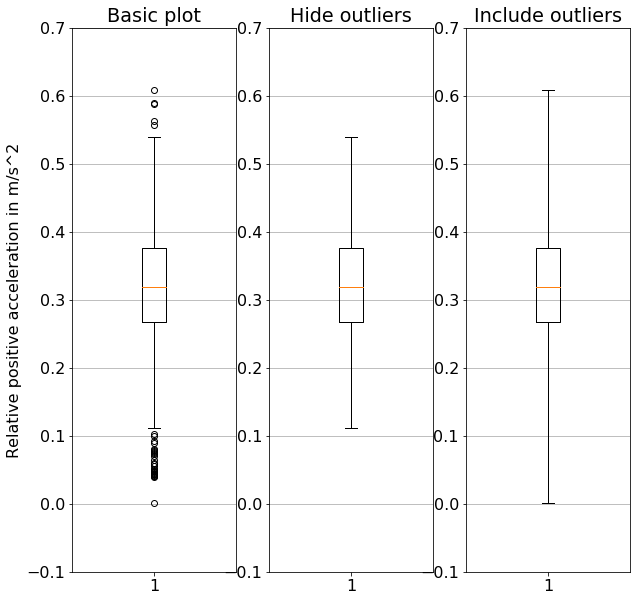

In [10]:
plotRPAUsingDifferentBox(data_df)

## Exercise 3.4.3 Calculate box plot characteristics

### Task
Now we are going to calculate all box plot characteristics manually. We will use them in later tasks.
1. Calculate all statistical measures that are included in a boxplot manually.

##### Signature of the script
* INPUT: Pandas dataframe data_df
* OUPUT: All statistical measures that are usually included in a box plot.

###### Reminder
Statistical measures that are usually included:<br/> 
* Median, Maximum and minimum  
* Quartiles (Q1 and Q3) and Interquartile range (IQR = Q3 – Q1)
* Whiskers (indicating  variability outside the Q1 and Q3): 
* Lower whisker: Q1 – 1.5*IQR
* Upper whisker: Q3 + 1.5*IQR
* Outliers

##### Hint
The whiskers, that are depicted in a box plot, represents real values. The upper whisker will extend to the last value less than (Q3 + whis * IQR). Similarly, the lower whisker will extend to the first value greater than (Q1 - whis * IQR). 
see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.boxplot.html

##### Solution
minimum = 0.00088893<br/>
maximum = 0.609692<br/>
median = 0.318714<br/>
lower_quartile = 0.267899<br/>
upper_quartile = 0.377053<br/>
lower_whisker = 0.111165<br/>
upper_whisker = 0.539693<br/>

### Your code here:

In [11]:
def calculateBoxPlotCharacteristics(data_df):
    result = {}
    
    result["minimum"] = np.min(data_df.rpa)
    result["maximum"] = np.max(data_df.rpa)
    result["median"] = np.median(data_df.rpa)
    
    q1 = np.percentile(data_df.rpa, 25)
    q3 = np.percentile(data_df.rpa, 75)
    iqr = q3 - q1
    result["lower_quartile"] = q1
    result["upper_quartile"] = q3
    
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    rpa_sort = np.sort(data_df.rpa)
    for i in range(len(rpa_sort)):
        if rpa_sort[i] > lower_whisker:
            result["lower_whisker"] = rpa_sort[i]
            break
    for i in reversed(range(len(rpa_sort))):
        if rpa_sort[i] < upper_whisker:
            result["upper_whisker"] = rpa_sort[i]
            break
    
    return result

In [12]:
print(calculateBoxPlotCharacteristics(data_df))

{'minimum': 0.00088893, 'maximum': 0.609692, 'median': 0.318714, 'lower_quartile': 0.267899, 'upper_quartile': 0.377053, 'lower_whisker': 0.111165, 'upper_whisker': 0.539693}


## Exercise 3.4.4 Compare box plot and histogram

### Task
Finally, we are going to visualize all box plot characeteristics inside of a histogram und compare the resulting plot with the box plot. 
1. Create a plot as depicted below. Set the number of bins of the histogram to the number of rpa values. 

##### Signature of the script
* INPUT: Pandas dataframe data_df
* OUPUT: Plot as depicted below

###### Reminder
-

##### Hint
* By passing gridspec_kw={'hspace': 0} to the subplot function you can hide the vertical space between two superposed subplots.
* In order to get the same plot styling as depicted below, you need to use following parameters: alpha=0.2, edgecolor='blue'

##### Solution
![title](data/img/solution_e433.png)

### Your code here:

(array([0.22760747, 0.        , 0.        , 0.68282242, 2.27607475,
        0.68282242, 0.45521495, 1.36564485, 0.22760747, 0.45521495,
        0.45521495, 0.        , 0.22760747, 0.        , 0.22760747,
        0.9104299 , 0.22760747, 0.68282242, 0.9104299 , 0.9104299 ,
        1.36564485, 1.36564485, 2.04846727, 2.04846727, 1.59325232,
        4.09693454, 3.18650465, 4.77975697, 6.37300929, 5.69018687,
        3.41411212, 6.14540182, 2.95889717, 3.18650465, 5.69018687,
        5.46257939, 3.18650465, 5.00736444, 3.41411212, 2.95889717,
        2.27607475, 2.50368222, 1.36564485, 1.36564485, 1.36564485,
        0.22760747, 0.45521495, 0.22760747, 0.22760747, 0.45521495,
        1.13803737, 0.22760747, 0.45521495, 0.22760747, 0.22760747,
        0.22760747, 0.        , 0.22760747, 0.22760747, 0.22760747]),
 array([0.00088893, 0.01103565, 0.02118237, 0.03132908, 0.0414758 ,
        0.05162252, 0.06176924, 0.07191595, 0.08206267, 0.09220939,
        0.10235611, 0.11250283, 0.12264954, 0.

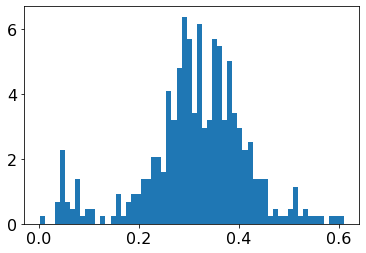

In [13]:
fig, ax = plt.subplots()
ax.hist(data_df.rpa, density=True, bins=60)

In [39]:
def plotBoxAndHistogram(data_df):
    result = calculateBoxPlotCharacteristics(data_df)
    
    fig, ax = plt.subplots(2, 1, gridspec_kw={'hspace':0}, figsize=(10,8))
    
    ax[0].boxplot(data_df.rpa, vert=False)
    
    weights = np.ones_like(data_df.rpa)/float(len(data_df.rpa))
    ax[1].hist(data_df.rpa, bins=60, alpha=0.2, edgecolor='blue', weights=weights)
    
    ax[0].grid(b=True, axis='x')
    ax[1].grid(b=True)
    
    ax[1].set(xlabel='Relative positive acceleration in m/s^2',
              ylabel='Relative frequency')
    
    # calculate the characteristics of bosplot
    result = calculateBoxPlotCharacteristics(data_df)
    
    ax[1].vlines(result['maximum'], 0, 0.1)
    ax[1].vlines(result['minimum'], 0, 0.1)
    ax[1].vlines(result['lower_quartile'], 0, 0.1)
    ax[1].vlines(result['upper_quartile'], 0, 0.1)
    ax[1].vlines(result['lower_whisker'], 0, 0.1)
    ax[1].vlines(result['upper_whisker'], 0, 0.1)
    ax[1].vlines(result['median'], 0, 0.1, color='orange')
    
    ax[1].set_ylim([0, 0.07])
    

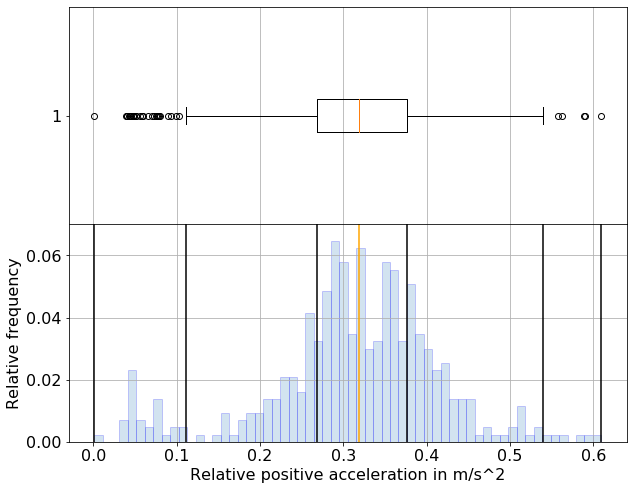

In [40]:
plotBoxAndHistogram(data_df)